In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [2]:
#global variables
figsize_x = 17
figsize_y = 5

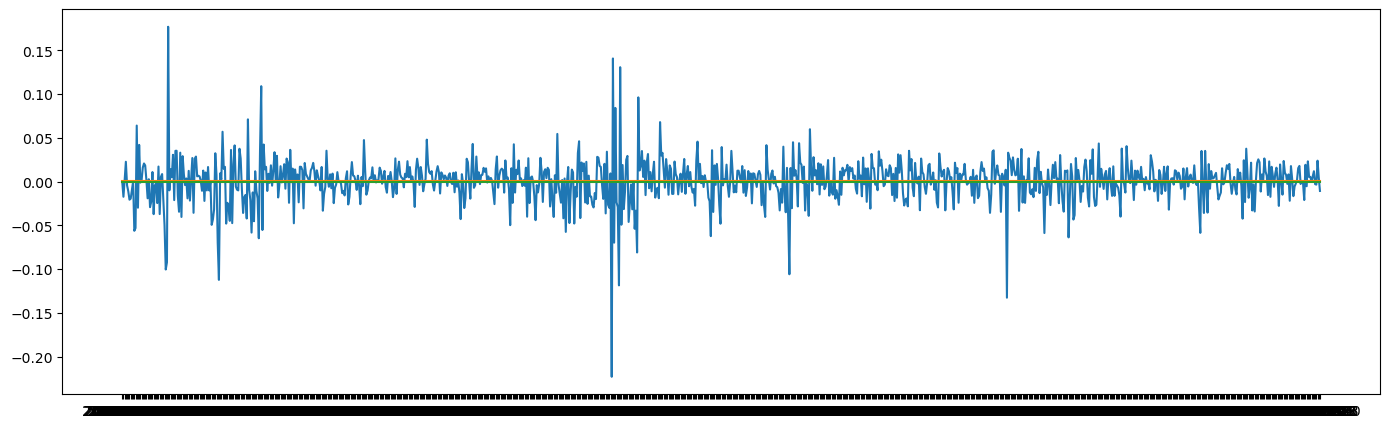

In [3]:
#importing data
df_SMI = pd.read_csv("Data (learning)/SMI_weekly_(Switzerland).csv")
df_SMI['Weekly Returns'] = df_SMI['Close'].pct_change()
df_SMI['Weekly Returns'] = pd.to_numeric(df_SMI['Weekly Returns'], errors='coerce')
df_SMI['Weekly Returns'].fillna(0, inplace=True)

#calculating weekly returns
df_SMI_np_returns = df_SMI.to_numpy()[:,-1]
df_SMI_np_date = df_SMI.to_numpy()[:,0]

#mean
mean_SMI_returns = np.mean(df_SMI_np_returns)*np.ones(len(df_SMI_np_returns))

#plot of returns for SMI weekly returns
plt.figure(figsize=(figsize_x,figsize_y))
plt.plot(df_SMI_np_date, df_SMI_np_returns)
plt.plot(df_SMI_np_date, mean_SMI_returns)
plt.plot(df_SMI_np_date, np.zeros(len(df_SMI_np_returns)))
plt.show()

/Users/goshabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


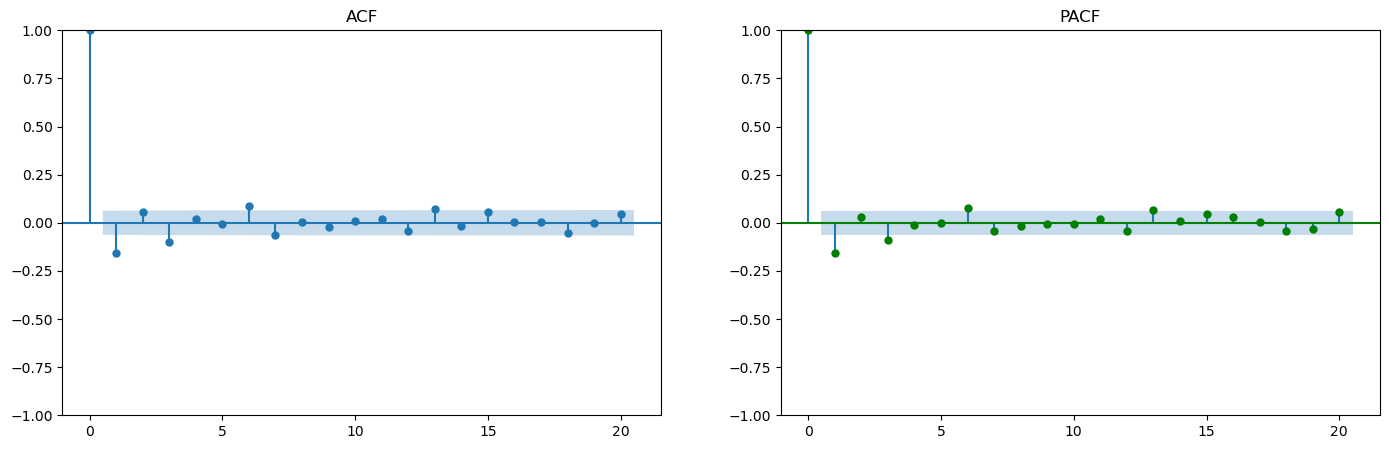

In [4]:
#ACF and PACF
lags = 20
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(figsize_x, figsize_y))
tsaplots.plot_acf(df_SMI_np_returns, lags=lags, title='ACF', ax=ax[0])
tsaplots.plot_pacf(df_SMI_np_returns, lags=lags, color='g', title='PACF', ax=ax[1])
plt.show()

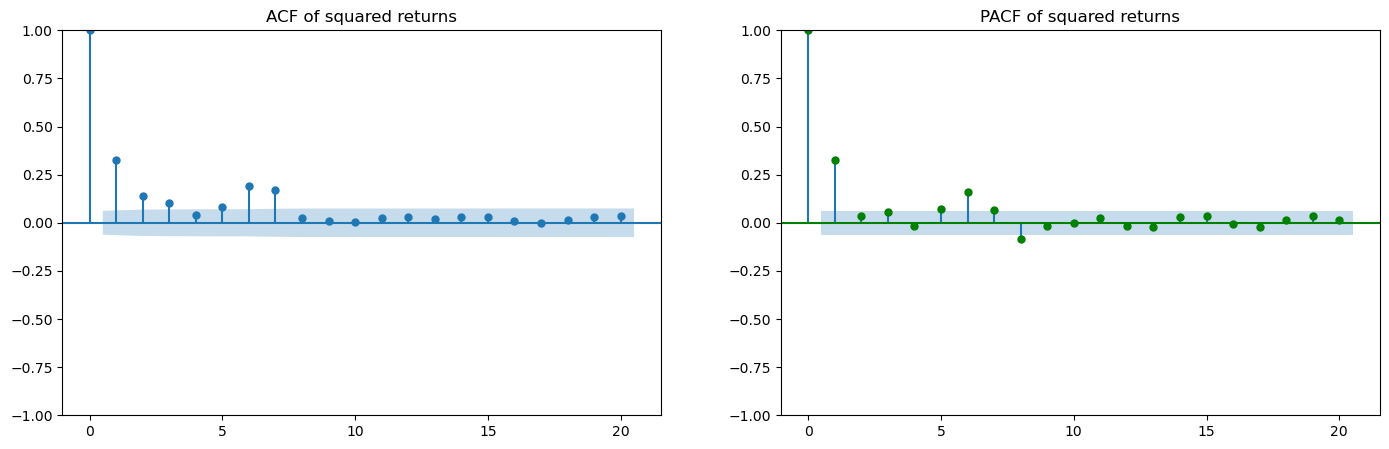

In [5]:
#squared residuals' ACF and PACF
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(figsize_x, figsize_y))
tsaplots.plot_acf(df_SMI_np_returns**2, lags=lags, title='ACF of squared returns', ax=ax[0])
tsaplots.plot_pacf(df_SMI_np_returns**2, lags=lags, color='g', title='PACF of squared returns', ax=ax[1])
plt.show()

In [20]:
#Normality test: Jarque-Bera test
def Jarque_Bera_test(skewness, kurtosis, n):
    JB = (n/6)*(skewness**2 + (kurtosis-3)**2/4)
    critical_val = 5.991 #chi-squared, dof=2

    if(JB<critical_val):
        return (JB, "sample is normal")
    
    return (JB, "sample is non-normal")
        

sample_skew = sp.stats.skew(list(df_SMI_np_returns))
sample_kurtosis = sp.stats.kurtosis(list(df_SMI_np_returns))
JB = Jarque_Bera_test(sample_skew, sample_kurtosis, n=len(df_SMI_np_returns))

print("Normality")
print("Skewness: ", sample_skew)
print("Kurtosis: ", sample_kurtosis)
print('Jarque-Bera test: ', JB)

#Stationarity tests: Augmented Dickey-Fuller and KPSS tests
ADF = sm.tsa.stattools.adfuller(df_SMI_np_returns, regression='ct')
KPSS = sm.tsa.stattools.kpss(df_SMI_np_returns, regression='ct', nlags='legacy')
print()
print("Stationarity")
print("ADF: ", ADF)
print("KPSS: ", KPSS)

Normality
Skewness:  -0.6065895418932294
Kurtosis:  11.975093627692525
Jarque-Bera test:  (3390.329843427602, 'sample is non-normal')

Stationarity
ADF:  (-20.347266037704312, 0.0, 2, 989, {'1%': -3.967952994278947, '5%': -3.4149385165727604, '10%': -3.1296683938683643}, -4406.53570022227)
KPSS:  (0.06237808943190155, 0.1, 22, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/Users/goshabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
